# 9.1 Normal Distributions


Normal distributions are perfectly symmetric, bell-shaped curves. These distributions can be totally descibed with only two values: the mean ($\mu$) and the standard deviation ($\sigma$).  


The most common application of normal distributions in education is when it comes to *standardized tests*. The SAT, ACT, AP exams, and MCAS tests are all examples of standardized tests. Standardizing tests is a way to keep the mean and standard deviation consistent year to year and also allows for a way to compare performance between students who took different tests.

Note: We are all part of the era when standardized testing became the big thing in education. There are pros and cons to it. It can be an interesting and controversial aspect of our education system. A basic awareness of the math behind it can be super important.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

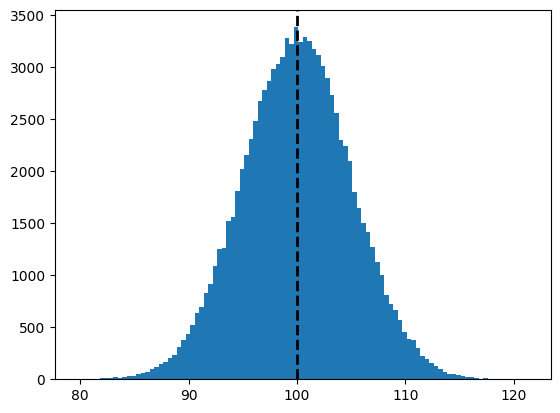

In [2]:
# Mean of the distribution
mean = 100

# satndard deviation of the distribution
standard_deviation  = 5

# size
size = 100000

# creating a normal distribution data
values = np.random.normal(mean, standard_deviation, size)

# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

##

## Identifying the Mean $\mu$

For a normal distribution, the mean can be identified as the point where the curve is at it's highest peak.

Since a normal curve is also symmetric, the mean is also the median.

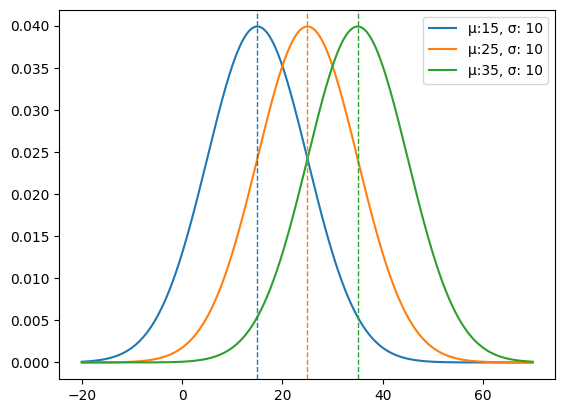

In [3]:
x = np.arange(-20, 70, 0.1)

sigma = 10

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 15, sigma), label='μ:15, σ: 10')
plt.plot(x, norm.pdf(x, 25, sigma), label='μ:25, σ: 10')
plt.plot(x, norm.pdf(x, 35, sigma), label='μ:35, σ: 10')

plt.axvline(15, color='tab:blue', linestyle='dashed', linewidth=1)
plt.axvline(25, color='tab:orange', linestyle='dashed', linewidth=1)
plt.axvline(35, color='tab:green', linestyle='dashed', linewidth=1)

plt.legend()

## Identifying the Standard Deviation $\sigma$
Recall that the standard deviation is a measure of spread.

The standard deviation can be trickier to spot on the graph. This is the point where the curve changes from turning upwards to turning downwards. This is also referred to as an **inflection point**.

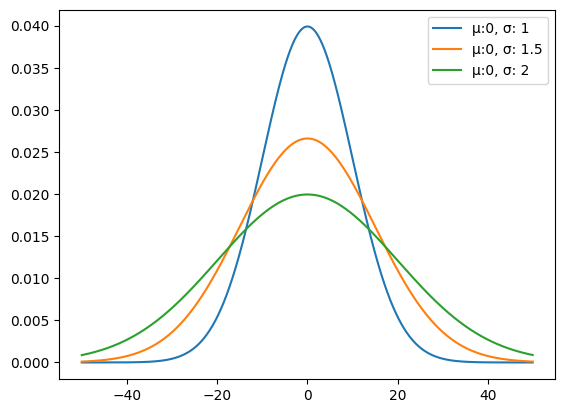

In [4]:
x = np.arange(-50, 50, 0.1)

mu = 0

#define multiple normal distributions
plt.plot(x, norm.pdf(x, mu, 10), label='μ:0, σ: 1')
plt.plot(x, norm.pdf(x, mu, 15), label='μ:0, σ: 1.5')
plt.plot(x, norm.pdf(x, mu, 20), label='μ:0, σ: 2')

plt.legend()


## The 68-95-99.7 Rule

If a dataset is perfectly normally distributed, then
* approximately 68% of the data values will fall within one standard deviation of the mean
* Approximately 95% of a normally distributed dataset will fall within 2 standard deviations of the mean.
* Approximately 99.7% of normally distributed data fall within 3 standard deviations of the mean.

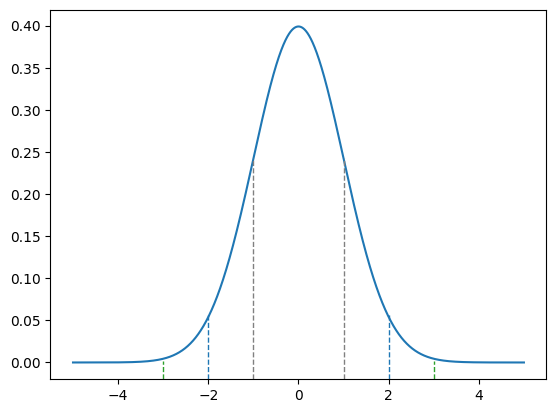

In [5]:
x = np.arange(-5, 5, 0.001)

mu = 0
sigma = 1

# plot normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), label='μ:15, σ: 10')
# plot vertical lines
plt.axvline(1, ymax=0.6, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(-1, ymax=0.6, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(2, ymax=0.18, color='tab:blue', linestyle='dashed', linewidth=1)
plt.axvline(-2, ymax=0.18, color='tab:blue', linestyle='dashed', linewidth=1)
plt.axvline(3, ymax=0.05, color='tab:green', linestyle='dashed', linewidth=1)
plt.axvline(-3, ymax=0.05, color='tab:green', linestyle='dashed', linewidth=1)

## Standardized Scores

Applying the 68-95-99.7 Rule, we must first figure out how many standard deviations above or below the mean our data fall. This is known as the **standardized score**.

Values above the mean have positive standardized scores, while those below the mean have negative standardized scores. We use $z$ to represent a standard score, this value is also often referred to as a $z$-score.

> **$z$-score**
> If $x$ is a member of a normally distributed dataset with mean $\mu$ and standard deviation $\sigma$, then the standardized score for $x$ is
$$ z = \frac{x - \mu}{\sigma}$$


To get the original value $x$ from the $z$-score we solve the above equation for $x$
$$ x = \mu + z \cdot \sigma $$

In [6]:
# can write mean OR mu
def z_score(data_value, mu, sigma):
  # calculates the z score for a given data value
  z = (data_value - mu) / sigma

  return z

def x_value(z_score, mu, sigma):
  # calculates the data value for a given z score
  x = mu + z_score * sigma
  return x

Let's test it on some values

In [7]:
mu = 50
sigma = 6
x = 52

z_score(x, mu, sigma)


0.3333333333333333

### Try it yourself

In [8]:
# find the z score for 40
data_value = 40
mu = 50
sigma = 6

z_score(40, 50, 6)

-1.6666666666666667

In [9]:
# find the z score for 68
data_value = 68
mu = 50
sigma = 6

z_score(68, 50, 6)

3.0

Now let's test our function to see if we get back the correct x value

In [10]:
x_value(0.33, mu, sigma)

51.98

## Finding values for non-standard percentiles

The reading for this section spent a lot of time discussing how to find data values of standard percentiles that have whole number $z$ scores. When dealing with real data, we often will will not have whole number $z$ scores.

Lucikly, we can find percentiles of a normal distribution using Python! We do this using the functions for `norm` from the `scipy` library (imported at the beginning of this notebook).

The math it's doing in the background is too complicated for this course. All you need to know to use it is the inputs it needs

`norm.cdf(value, mu, sigma)`

So if you want to find percentile for a given `value` in a normally distributed dataset, all you need is the mean `mu` and the standard deviation `sigma`.

Let's replicate an example from the reading.

### Example finding percentile values

In a normally distributed with $\mu = 40$ and $\sigma = 7$ find the what the percentile will be for the value 50.

In [23]:
ex_mu = 40
ex_sigma = 7
ex_val = 50

ex_percentile = norm.cdf(ex_val, ex_mu, ex_sigma)

# number before second f is how many decimal places you want to see
print(f'Percentile: {ex_percentile*100:.0f}')


Percentile: 92


So, we can see that the value 50 will fall in the 92nd percentile

#### Try it Yourself

For normally distributed data with a mean of 28 and standard deviation of 4, find the percentiles for the following data values:
* 30
* 23
* 35

In [36]:
ty_1_mu = 28
ty_1_sigma = 4
ty_1_val = 30

ty_1_percentile = norm.cdf(ty_1_val, ty_1_mu, ty_1_sigma)

# print(f'Percentile: {ty_1_percentile*100:.2f}')
print(ty_1_percentile)

0.6914624612740131


In [38]:
# can enter all values at once in a list

norm.cdf([30, 23, 35], ty_1_mu, ty_1_sigma)

array([0.69146246, 0.10564977, 0.95994084])

## Find data value for given percentiles

Suppose we wanted to go in the other direction and needed to find the data value at a given percentile (hint: you will need this in project 3!)

We use the following function

`norm.ppf(percentile, mu, sigma)`

Note that you will need to make sure your percentile value is a decimal and not entered in as a percent.

Let's replicate an example from the reading.

### Example finding data values from percentiles

Suppose we have a normally distributed data set with a mean of 150 and a standard deviation of 25.

Find the data values for the 30th percentiles

In [39]:
ex2_mu = 150
ex2_sigma = 25
# ex2_percentile = 0.30

norm.ppf(0.30, ex2_mu, ex2_sigma)


np.float64(136.88998718229897)

So the 30th percentile is roughly 137.

Note: we're not going to get too crazy about rounding rules here. It really matters when we know what kind of data we're talking about. Ror example, it doesn't make a lot of sense to have 135.88 people - so if our data value represented number of people, we'd round up. In other cases, it may make sense to round to 4 decimal places, etc. Without context we just don't know.

Luckily, when doing things with code, we can store our result in a variable and use it elsewhere to ensure accuraccy without any rounding issues.

If we wanted to round this value to two decimal places we'd do the following:

In [42]:
ex2_result = norm.ppf(0.30, ex2_mu, ex2_sigma)
# rounding the value
np.round(ex2_result, decimals=8)

np.float64(136.88998718)

#### Try it Yourself
Suppose we have a normally distributed data set with a mean of 47 and a standard deviation of 9.

Find the data values for the given percentiles

* 75
* 12
* 90

Try rounding your results to 1 decimal place.

In [17]:
norm.ppf(percentile, mu, sigma)

mu = 47
sigma = 9
percentile = 0.75

norm.ppf(0.75, 47, 9)

NameError: name 'percentile' is not defined

In [ ]:
np.float64(53.07040775176473)

number = 53.07040775176473
rounding_output = round(number, 1)
rounding_output

In [ ]:
norm.ppf(percentile, mu, sigma)

mu = 47
sigma = 9
percentile = 0.12

norm.ppf(0.712, 47, 9)

In [ ]:
np.float64(52.03313279850716)

number = 52.03313279850716
rounding_output = round(number, 1)
rounding_output

In [ ]:
norm.ppf(percentile, mu, sigma)

mu = 47
sigma = 9
percentile = 0.90

norm.ppf(0.90, 47, 9)

In [ ]:
np.float64(58.5339640899014)

number = 58.5339640899014
rounding_output = round(number, 1)
rounding_output

To figure out how to round the outputs to one decimal place, I asked ChatGPT how I can round an numeric output in python, and it gave me the function with round(the number, 1), which is telling the code to round the output number to one decimal point. Now after seeing that the function is successful, it is pretty self explanitory as to what it does, I just didn't know where to begin https://chatgpt.com/share/67f680a6-4714-800b-a014-250fba8b880d